In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
plt. figure(figsize=(2, 1))

<Figure size 200x100 with 0 Axes>

<Figure size 200x100 with 0 Axes>

In [37]:
data = pd.read_csv('Data.csv')
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [38]:
# Basic exploration
print(data.shape)
print(data.info())
print(data.describe().drop(['count']).round(1))
# print(data.isnull().sum())

# Education: 1 (Below College), 2 (College), 3 (Bachelor), 4 (Master), 5 (Doctor)
# Environment Satisfaction: 1 (Low), 2 (Medium), 3 (High), 4 (Very High)
# Job Involvement: 1 (Low), 2 (Medium), 3(High), 4 (Very High)
# Job Satisfaction: 1 (Low),2(Medium),3 (High), 4 (Very High)
# Performance Rating: 1 (Low), 2 (Good), 3 (Excellent), 4 (Outstanding)
# Relationship Satisfaction: 1 (Low), 2(Medium), 3 (High), 4 (Very High)
# Work-Life Balance: 1 (Bad), 2 (Good), 3 (Better), 4 (Best)

(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel     

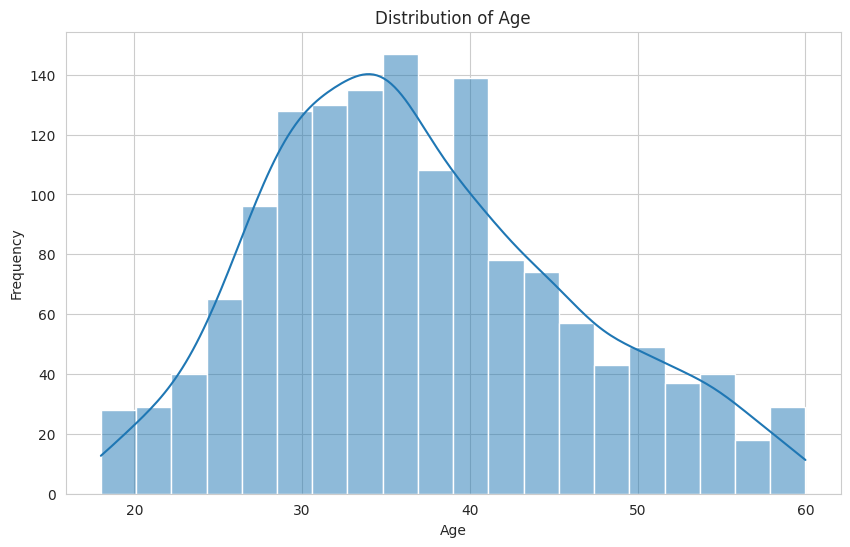

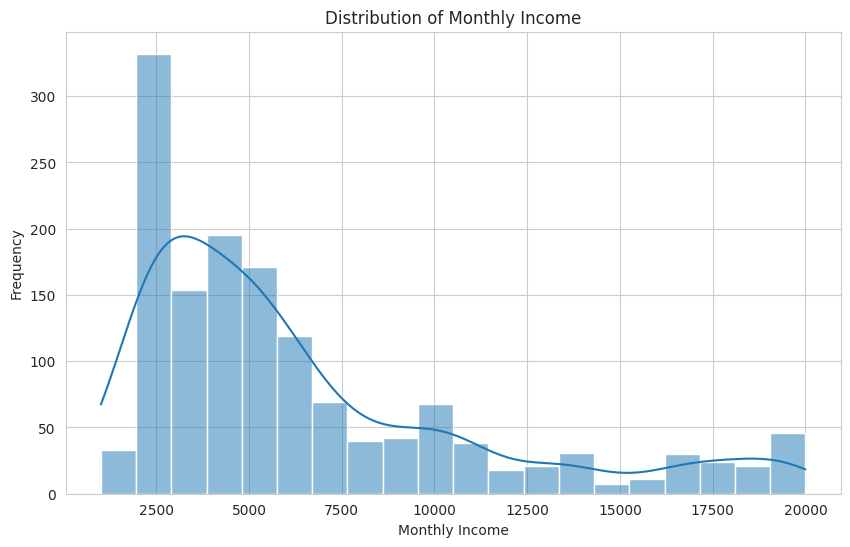

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(data['MonthlyIncome'], bins=20, kde=True)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()


In [44]:
# label_encoder = LabelEncoder()
# categorical_cols = [
#     "Attrition",
#     "BusinessTravel",
#     "Department",
#     "EducationField",
#     "Gender",
#     "JobRole",
#     "MaritalStatus",
#     "Over18",
#     "OverTime",
# ]
# for col in categorical_cols:
#     data[col] = label_encoder.fit_transform(data[col])
# print(data.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

In [45]:
# for col in categorical_cols:
#     print(f"Distribution for {col}:")
#     print(data[col].value_counts())
#     print()

Distribution for Attrition:
0    1233
1     237
Name: Attrition, dtype: int64

Distribution for BusinessTravel:
2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64

Distribution for Department:
1    961
2    446
0     63
Name: Department, dtype: int64

Distribution for EducationField:
1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

Distribution for Gender:
1    882
0    588
Name: Gender, dtype: int64

Distribution for JobRole:
7    326
6    292
2    259
4    145
0    131
3    102
8     83
5     80
1     52
Name: JobRole, dtype: int64

Distribution for MaritalStatus:
1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

Distribution for Over18:
0    1470
Name: Over18, dtype: int64

Distribution for OverTime:
0    1054
1     416
Name: OverTime, dtype: int64



In [1]:
import matplotlib.pyplot as plt

# Create a bar chart to visually compare attrition rates relative to role sizes
plt.figure(figsize=(10, 6))

# Plot the attrition rates
plt.bar(['Higher Roles', 'Lower Roles'],
        [higher_role_attrition_rate_relative, lower_role_attrition_rate_relative],
        color=['blue', 'orange'])

# Adding titles and labels
plt.title('Relative Attrition Rate Comparison: Higher vs. Lower Roles')
plt.ylabel('Attrition Rate Relative to Size (%)')
plt.xlabel('Role Type')
plt.ylim(0, 25)  # Set limit to make the difference more visible

# Add the data labels on the bars
for index, value in enumerate([higher_role_attrition_rate_relative, lower_role_attrition_rate_relative]):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Create a figure with two subplots using seaborn
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Raw numbers of employees and leavers using seaborn
sns.barplot(x=role_types, y=total_employees, color='#88C0D0', ax=ax[0], label='Total Employees')  # Soft blue
sns.barplot(x=role_types, y=leavers, color='#BF616A', ax=ax[0], label='Leavers')  # Soft red
ax[0].set_title('Raw Numbers of Employees and Leavers')
ax[0].set_ylabel('Number of Employees')
ax[0].set_xlabel('Role Type')
ax[0].legend()

# Add data labels
for i, (total, left) in enumerate(zip(total_employees, leavers)):
    ax[0].text(i, total + 20, f'Total: {total}', ha='center', fontsize=10, color='black')
    ax[0].text(i, left + 10, f'Left: {left}', ha='center', fontsize=10, color='black')

# Second subplot: Attrition rates relative to role sizes using seaborn with softer colors
sns.barplot(x=role_types, y=attrition_rates, palette=['#5E81AC', '#A3BE8C'], ax=ax[1])  # Soft blue and green
ax[1].set_title('Relative Attrition Rates: Higher vs. Lower Roles')
ax[1].set_ylabel('Attrition Rate Relative to Size (%)')
ax[1].set_xlabel('Role Type')
ax[1].set_ylim(0, 25)

# Add data labels
for index, rate in enumerate(attrition_rates):
    ax[1].text(index, rate + 0.5, f'{rate:.2f}%', ha='center', fontsize=10, color='black')

# Show the refined seaborn-enhanced plots with softer colors
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined